In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import os
#print(os.listdir("../input"))

In [2]:
#reading tmdb csv file and storing that to a variable
data = pd.read_csv('movie_bd_v5.csv')

#calling out first 5 rows (excluding headers) of tmdb database
data.head()

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015
1,tt1392190,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,7.1,2015
2,tt2908446,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,6.3,2015
3,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,7.5,2015
4,tt2820852,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,7.3,2015


In [3]:
movie_bd = ([(data['revenue'] > 2000000) & (data['budget'] >= 5000000) & (data['release_year'] > 1999)])
len(movie_bd)

1

In [7]:
movie_bd['profit'] = tmdb['revenue'] - tmdb['budget']
movie_bd = (movie_bd[(movie_bd['profit'] >= 2000000) | (movie_bd['profit'] <= -2000000)])
len(movie_bd)

NameError: name 'tmdb' is not defined

In [20]:
data['profit'] = data['revenue'] - data['budget']

In [21]:
movie_bd = movie_bd[['imdb_id', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'tagline', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date', 'vote_average', 'release_year',]]

NameError: name 'movie_bd' is not defined

In [ ]:
movie_bd = movie_bd.dropna()
print(len(movie_bd))
print(movie_bd.isna().sum())

In [ ]:
movie_bd.duplicated().sum()

In [ ]:
movie_bd = movie_bd[movie_bd['imdb_id'] != 'tt1032751']
len(movie_bd)

In [ ]:
movie_bd.to_csv('movie_bd_v5.csv',index=False)

In [ ]:
movie_bd = pd.read_csv('movie_bd_v5.xls')
movie_bd.sample(5)

In [ ]:
movie_bd.describe()

In [ ]:
len(movie_bd)

# Предобработка

In [4]:
answers = {}

#making a new column
movie_bd['profit'] = movie_bd['revenue'] - movie_bd['budget']
#movie_bd['cof_profit'] = movie_bd['revenue']/movie_bd['budget']

#the the given in the dataset is in string format.
#So we need to change this in datetime format



#movie_bd['release_date'].head()

movie_bd['season'] = movie_bd['release_date'].apply(lambda dt: (dt.month%12 + 3)//3) # лето, весна, осень, зима

TypeError: list indices must be integers or slices, not str

In [ ]:
data = movie_bd

# 1. У какого фильма из списка самый большой бюджет?
Варианты ответов:
1. The Dark Knight Rises (tt1345836)
2. Spider-Man 3 (tt0413300)
3. Avengers: Age of Ultron (tt2395427)
4. **The Warrior's Way	(tt1032751)**
5. Pirates of the Caribbean: On Stranger Tides (tt1298650)

In [ ]:
answers['1'] = '5. Pirates of the Caribbean: On Stranger Tides (tt1298650)'

In [8]:
print(data.original_title[data.budget.idxmax()])

Pirates of the Caribbean: On Stranger Tides


In [33]:
data[data['budget'] == data['budget'].max()]['original_title'].values[0]

'Pirates of the Caribbean: On Stranger Tides'

In [34]:

data.loc[data['budget'] == data['budget'].max(),'original_title'].values[0]

'Pirates of the Caribbean: On Stranger Tides'

In [35]:

data.original_title[data.budget.idxmax()]

'Pirates of the Caribbean: On Stranger Tides'

In [ ]:
%%timeit
data.sort_values(['budget'], ascending=False).head(1)['original_title']

ВАРИАНТ 2

In [ ]:
# Top 10
data[['budget', 'original_title', 'imdb_id']].sort_values('budget', ascending=False)[:10]

# 2. Какой из фильмов самый длительный (в минутах)?
1. The Lord of the Rings: The Return of the King	(tt0167260)
2. **Gods and Generals	(tt0279111)**
3. King Kong	(tt0360717)
4. Pearl Harbor	(tt0213149)
5. Alexander	(tt0346491)

In [ ]:
answers['2'] = '2. Gods and Generals (tt0279111)'

In [36]:
data.loc[data.runtime==data.runtime.max(),'original_title'].values[0]

'Gods and Generals'

In [ ]:
data.original_title[data.runtime.idxmax()]

In [ ]:
# Top 10
data[['runtime', 'original_title', 'imdb_id']].sort_values('runtime', ascending=False)[:10]

# 3. Какой из фильмов самый короткий (в минутах)?
Варианты ответов:

1. Home on the Range	tt0299172
2. The Jungle Book 2	tt0283426
3. **Winnie the Pooh	tt1449283**
4. Corpse Bride	tt0121164
5. Hoodwinked!	tt0443536





In [ ]:
answers['3'] = '3. Winnie the Pooh tt1449283'

In [ ]:
data.loc[data.runtime==data.runtime.min(),'original_title'].values[0]

In [ ]:
print(data.original_title[data.runtime.idxmin()])

In [ ]:
# Top 10
data[['runtime', 'original_title', 'imdb_id']].sort_values('runtime', ascending=False)[-10:]

# 4. Какова средняя длительность фильмов?

Варианты ответов:
1. 115
2. 110
3. 105
4. 120
5. 100


In [ ]:
answers['4'] = '2. 110'

In [ ]:
data['runtime'].mean()

In [ ]:
data.runtime.mean()

# 5. Каково медианное значение длительности фильмов? 

Варианты ответов:
1. 107
2. 112
3. 101
4. 120
5. 115




In [ ]:
answers['5'] = '1. 107'

In [ ]:
data.runtime.median()

# 6. Какой самый прибыльный фильм?
### Внимание! Здесь и далее под «прибылью» или «убытками» понимается разность между сборами и бюджетом фильма. (прибыль = сборы - бюджет) в нашем датасете это будет (profit = revenue - budget) 

Варианты ответов:
1. The Avengers	tt0848228
2. Minions	tt2293640
3. Star Wars: The Force Awakens	tt2488496
4. Furious 7	tt2820852
5. **Avatar	tt0499549**

In [ ]:
answers['6'] = '5. Avatar tt0499549'

In [ ]:
data.loc[data.profit==data.profit.max(),'original_title'].values[0]

In [ ]:
print(data.original_title[data.profit.idxmax()])

In [ ]:
data[['profit', 'original_title', 'imdb_id']].sort_values('profit', ascending=False)[:10]

# 7. Какой фильм самый убыточный? 

Варианты ответов:
1. Supernova tt0134983
2. Frozen	tt2294629
3. Speed Racer	tt0811080
4. The Adventures of Pluto Nash	tt0180052
5. Miles to Gracelan	tt0233142

In [ ]:
answers['7'] = '4. The Adventures of Pluto Nash (tt0180052)'

In [ ]:
data.sort_values(by='profit').head(10)['original_title']

In [ ]:
# Top 10
data[['profit', 'original_title', 'imdb_id']].sort_values('profit', ascending=False)[-10:]

# 8. У скольких фильмов из датасета объем сборов оказался выше бюджета?
Варианты ответов:
1. **1478**
2. 1520
3. 1241
4. 1135
5. 1398


In [ ]:
answers['8'] = '1. 1478'

In [ ]:
%%time
len(data[data['profit'] > 0])

In [ ]:
%%time
data.loc[(data.profit)>0].shape[0]

# 9. Какой фильм оказался самым кассовым в 2008 году?
Варианты ответов:
1. Madagascar: Escape 2 Africa	tt0479952
2. Iron Man	tt0371746
3. Kung Fu Panda	tt0441773
4. **The Dark Knight	tt0468569**
5. Mamma Mia!	tt0795421

In [ ]:
answers['9'] = '4. The Dark Knight (tt0468569)'

In [ ]:
data.loc[data.release_year==2008].sort_values(by='revenue',ascending=False).head(1)['original_title'].values[0]

In [ ]:
d = data.loc[data.release_year == 2008]
d.set_index('original_title')['profit'].idxmax()

In [ ]:
# Top 10
data[['revenue', 'original_title', 'imdb_id']][data['release_year']==2008].sort_values('revenue', ascending=False)[:10]

# 10. Самый убыточный фильм за период с 2012 по 2014 г. (включительно)?
Варианты ответов:
1. Winter's Tale	tt1837709
2. Stolen	tt1656186
3. Broken City	tt1235522
4. Upside Down	tt1374992
5. **The Lone Ranger	tt1210819**


In [ ]:
answers['10'] = '5. The Lone Ranger (tt1210819)'

In [ ]:
data.loc[(data.release_year>=2012)&(data.release_year<=2014)].sort_values(by='profit')#.head(1)['original_title'].values[0]

In [ ]:
data[data.profit == data.query('2012 <= release_year <= 2014').profit.min()]

In [ ]:
colums_ls=['profit', 'original_title', 'imdb_id','release_year']
movie_bd[colums_ls][(movie_bd['release_year']>=2012) & (movie_bd['release_year']<=2014)].sort_values('profit', ascending=False)[-10:]

# 11. Какого жанра фильмов больше всего?
Варианты ответов:
1. Action
2. Adventure
3. **Drama**
4. Comedy
5. Thriller

In [ ]:
answers['11'] = '3. Drama'

### ВАРИАНТ 1
через модуль collections с функцией Counter

In [ ]:
Counter(data['genres'].str.cat(sep='|').split('|')).most_common(1)

In [ ]:
Counter(data.genres.str.split('|').sum()).most_common(1)

### Вариант 2

In [ ]:
pd.Series(data['genres'].str.cat(sep='|').split('|')).value_counts()[:5]

по шагам

In [ ]:
# превращаем все в одну строку
data['genres'].str.cat(sep='|')[:100]

In [ ]:
# создаем список разделяя строку по '|'
pd.Series(data['genres'].str.cat(sep='|').split('|'))[:5]

In [ ]:
# считаем количество элементов в серии
pd.Series(data['genres'].str.cat(sep='|').split('|')).value_counts()[:5]

Text(0, 0.5, 'Movies')

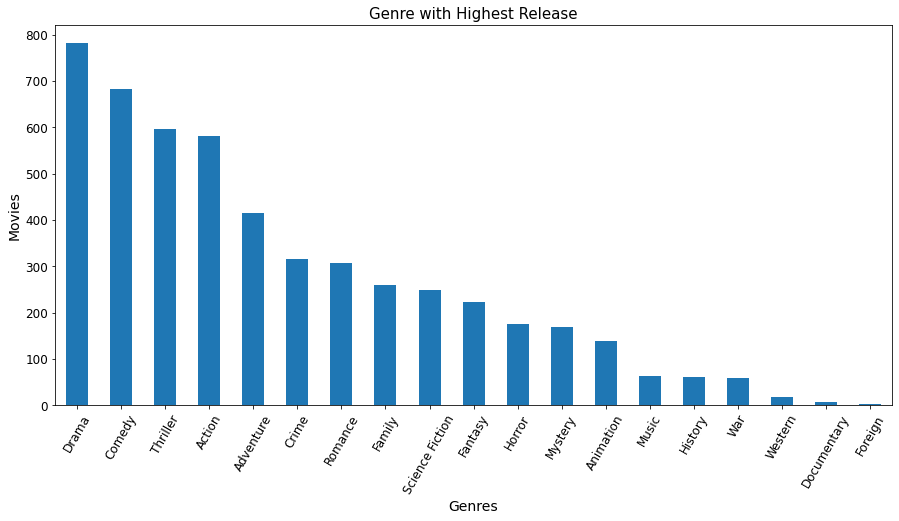

In [6]:
# завернем в функцию и будем использовать в дальнейшем
def counter(movie_bd, x):
    data_tmp=movie_bd[x].str.cat(sep='|') # превращаем все в одну строку
    data_tmp=pd.Series(data_tmp.split('|')) # создаем список разделяя строку по '|'
    data_tmp=data_tmp.value_counts(ascending=False) # считаем количество элементов строке
    return data_tmp 

count=counter(data,'genres')
count.plot(kind='bar',figsize=(15,7),fontsize=12)
plt.xticks(rotation=60)
plt.title("Genre with Highest Release",fontsize=15)
plt.xlabel("Genres",fontsize=14)
plt.ylabel("Movies",fontsize=14)

# 12. Фильмы какого жанра чаще всего становятся прибыльными? 

Варианты ответов:
1. **Drama**
2. Comedy
3. Action
4. Thriller
5. Adventure

In [ ]:
answers['12'] = '1. Drama'

In [ ]:
data_tmp = data[data['profit'] > 0]

In [ ]:
print(pd.Series((data_tmp.genres.str.split('|').sum())).value_counts().index[0])

ВАРИАНТ 2

In [ ]:
data_tmp = data[data['profit'] > 0]

In [ ]:
data_tmp=counter(data_tmp,'genres')
data_tmp.plot(kind='bar',figsize=(15,7),fontsize=12)
plt.xticks(rotation=60)
plt.title("Genre with Highest Release",fontsize=15)
plt.xlabel("Genres",fontsize=14)
plt.ylabel("Movies",fontsize=14)

# 13. У какого режиссера самые большие суммарные кассовые сбооры?
Варианты ответов:
1. Steven Spielberg
2. Christopher Nolan
3. David Yates
4. James Cameron
5. **Peter Jackson**


In [ ]:
answers['13'] = '5. Peter Jackson'

In [ ]:
# немного схитрим, и воспользуемся уже готовой функцией
directors=counter(data,'director')
directors['Ridley Scott']

In [ ]:
# наша функция counter возвращает нам словарь, а как мы помним индексы у словаря уникальны что позволит нам 
# 1. сразу получить список режисеров без дублей (directors.index)
# 2. заполнить значение словаря нужными нам показателем
for director in directors.index:
    directors[director] = data['revenue'][data['director'].map(lambda x: True if director in x else False)].sum()

# отсортируем
directors = pd.DataFrame(directors).sort_values(0, ascending=False)
directors[:10]

In [ ]:
directors[:10].plot(kind='bar',figsize=(15,7),fontsize=12)
plt.xticks(rotation=60)
plt.title("director with Highest Profit",fontsize=15)
plt.xlabel("director",fontsize=14)
plt.ylabel("$",fontsize=14)

ВАРИАНТ 2

In [ ]:
directors = set(data.director.str.split('|').sum())
pd.Series({x: data[data.director.str.contains(x)].revenue.sum() for x in directors}).\
                    sort_values(ascending = False).head(5)

# 14. Какой режисер снял больше всего фильмов в стиле Action?
Варианты ответа:
1. Ridley Scott
2. Guy Ritchie
3. Robert Rodriguez
4. Quentin Tarantino
5. Tony Scott

In [ ]:
answers['14'] = '3. Robert Rodriguez'

In [ ]:
data_tmp = data[data.genres.str.contains("Action")]

In [ ]:
sum_gen=counter(data_tmp,'director')
sum_gen[:10].plot(kind='bar',figsize=(15,7),fontsize=10)
plt.xticks(rotation=60)
plt.xlabel("director",fontsize=14)
plt.ylabel("Movies",fontsize=14)
sum_gen[:5]

# 15. У какого актера самые высокие суммарные кассовые сборы в 2012 году? (суммарные сборы по фильмам с его участием)
Варианты ответов:
1. Nicolas Cage
2. Tom Hardy
3. Chris Hemsworth
4. Jim Sturgess
5. Emma Stone

In [ ]:
answers['15'] = '3. Chris Hemsworth'

In [28]:
# решаем аналогично только фильтруем датасет по году
sum_gen=counter(data[data['release_year']==2012],'cast')
for gen in sum_gen.index:
    sum_gen[gen] = data['revenue'][data['release_year']==2012][data['cast'].map(lambda x: True if gen in x else False)].sum()
sum_gen = pd.DataFrame(sum_gen).sort_values(0, ascending=False)
sum_gen[:10].plot(kind='bar',figsize=(15,7),fontsize=12)
plt.xticks(rotation=60)
plt.title("cast with Highest Profit",fontsize=15)
plt.xlabel("cast",fontsize=14)
plt.ylabel("$",fontsize=14)
sum_gen[:10]

NameError: name 'counter' is not defined

# 16. Какой актер снялся в большем количестве высокобюджетных фильмов? (в фильмах где бюджет выше среднего по данной выборке)
Варианты ответов:
1. Tom Cruise
2. Mark Wahlberg 
3. Matt Damon
4. Angelina Jolie
5. Brad Pitt

In [ ]:
answers['16'] = '3. Matt Damon'

In [ ]:
data['budget'].mean()

Matt Damon           18
Adam Sandler         17
Angelina Jolie       16
Eddie Murphy         15
Tom Cruise           15
Samuel L. Jackson    15
Mark Wahlberg        14
Russell Crowe        14
Jamie Foxx           14
Hugh Jackman         14
dtype: int64

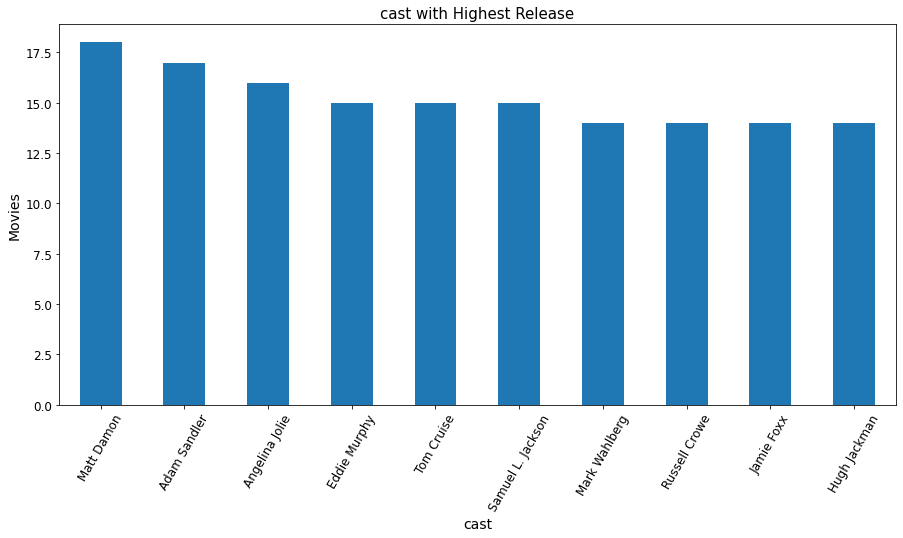

In [7]:
sum_gen=counter(data[data['budget'] > data['budget'].mean()],'cast')
sum_gen[:10].plot(kind='bar',figsize=(15,7),fontsize=12)
plt.xticks(rotation=60)
plt.title("cast with Highest Release",fontsize=15)
plt.xlabel("cast",fontsize=14)
plt.ylabel("Movies",fontsize=14)
sum_gen[:10]

ВАРИАНТ 2

In [10]:
pd.Series(data[data.budget > data.budget.mean()].cast.str.split('|').sum()).value_counts().index[0]

'Matt Damon'

# 17. В фильмах какого жанра больше всего снимался Nicolas Cage?  
Варианты ответа:
1. Drama
2. Action
3. Thriller
4. Adventure
5. Crime

In [ ]:
answers['17'] = '2. Action'

In [ ]:
Counter(data[data.cast.str.contains('Nicolas Cage')].genres.str.split('|').sum()).most_common(1)

ВАРИАНТ 2

In [ ]:
data_tmp = data[data.cast.str.contains("Nicolas Cage")]
# or
data_tmp = data[data['cast'].map(lambda x: True if 'Nicolas Cage' in x else False)]

In [ ]:
sum_gen=counter(data_tmp,'genres')
sum_gen.plot(kind='bar',figsize=(15,7),fontsize=12)
plt.xticks(rotation=60)
plt.title("Genre with Highest Release",fontsize=15)
plt.xlabel("Genres",fontsize=14)
plt.ylabel("Movies",fontsize=14)

# 18. Самый убыточный фильм от Paramount Pictures
Варианты ответа:

1. K-19: The Widowmaker tt0267626
2. Next tt0435705
3. Twisted tt0315297
4. The Love Guru tt0811138
5. The Fighter tt0964517

In [ ]:
answers['18'] = '1. K-19: The Widowmaker (tt0267626)'

In [ ]:
data[data['production_companies'].str.contains('Paramount Pictures', na=False)].sort_values(by='profit').head(1)['original_title'].values[0]

In [ ]:
print_columns = ['profit', 'original_title', 'imdb_id', 'production_companies']
data[print_columns][data['production_companies'].map(lambda x: True if 'Paramount Pictures' in x else False)].sort_values('profit', ascending=False)[-10:]

# 19. Какой год стал самым успешным по суммарным кассовым сборам?
Варианты ответа:
1. 2014
2. 2008
3. 2012
4. 2002
5. 2015

In [ ]:
answers['19'] = '5. 2015'

In [ ]:
data.groupby('release_year')['revenue'].sum().plot()
print(data.groupby('release_year')['revenue'].sum().sort_values(0, ascending=False)[:10])
plt.title('Year vs Average revenue',fontsize=15)
plt.xlabel('Release Year',fontsize=12)
plt.ylabel('Average revenue',fontsize=12)
plt.yticks(rotation=90)

ВАРИАНТ 2

In [ ]:
best_profit = pd.pivot_table(data, values='revenue', index='release_year', aggfunc='sum')
best_profit.revenue.sort_values(ascending=False).head(1)

# 20. Какой Самый прибыльный год для студии Warner Bros?
Варианты ответа:
1. 2014
2. 2003
3. 2012
4. 2010
5. 2015

In [ ]:
answers['20'] = '1. 2014'

In [ ]:
data[data.production_companies.str.contains('Warner Bros')].groupby('release_year')['profit'].sum().idxmax()

In [ ]:
#Оставляем только записи фильмов, принадлежащих компании Warner Bros
warner_df = data[data['production_companies'].str.contains('Warner Bros')]

warner_df.groupby(['release_year'])['profit'].sum().sort_values(ascending = False)

In [ ]:
warner_df.groupby(['release_year'])['profit'].sum().plot()
plt.title('Year vs Average Profit',fontsize=15)
plt.xlabel('Release Year',fontsize=12)
plt.ylabel('Average Profit',fontsize=12)
plt.yticks(rotation=90)

# 21. В каком месяце за все годы суммарно вышло больше всего фильмов?
Варианты ответа:
1. Январь
2. Июнь
3. Декабрь
4. Сентябрь
5. Май

In [ ]:
answers['21'] = '4. Сентябрь'

In [ ]:
# не забываем сделать pd.to_datetime(data['release_date']) при предобработке
data.groupby(data['release_date'].dt.strftime('%B'))['imdb_id'].count().sort_values(ascending = False)

ВАРИАНТ 2

In [ ]:
data.release_date.dt.month.value_counts()

# 22. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)
Варианты ответа:
1. 345
2. 450
3. 478
4. 523
5. 381

In [ ]:
answers['22'] = '2. 450'

In [ ]:
print(len(data[(data.release_date.dt.month >=6) & (data.release_date.dt.month <=8)]))

In [ ]:
len(data[data.release_date.dt.month.isin([6, 7, 8,])])

In [ ]:
print(len(data[data['season'] == 3]))

# 23. Какой режисер выпускает (суммарно по годам) больше всего фильмов зимой?
Варианты ответов:
1. Steven Soderbergh
2. Christopher Nolan
3. Steven Spielberg
4. Ridley Scott
5. Peter Jackson

In [ ]:
answers['23'] = '5. Peter Jackson'

In [ ]:
data_tmp = data[data['season'] == 1]
# or
data_tmp = data[data.release_date.dt.month.isin([1, 2, 12,])]

In [ ]:
sum_gen=counter(data_tmp,'director')
print(sum_gen[:10])
sum_gen[:10].plot(kind='bar',figsize=(15,7),fontsize=12)
plt.xticks(rotation=60)
plt.title("director with Highest Release",fontsize=15)
plt.xlabel("director",fontsize=14)
plt.ylabel("Movies",fontsize=14)

# 24. Какая студия дает самые длинные названия своим фильмам по количеству символов?
Варианты ответа:
1. Universal Pictures
2. Warner Bros
3. Miramax Films
4. Paramount Pictures
5. Four By Two Productions

In [ ]:
answers['24'] = '5. Four By Two Productions'

In [ ]:
data['title_length'] = data['original_title'].map(lambda x: len(x))

In [12]:
sum_gen=Counter(data,'production_companies')
for gen in sum_gen.index:
    sum_gen[gen] = data['title_length'][data['production_companies'].map(lambda x: True if gen in x else False)].mean()
sum_gen = pd.DataFrame(sum_gen).sort_values(0, ascending=False)
sum_gen[:10].plot(kind='bar',figsize=(15,7),fontsize=12)
plt.xticks(rotation=60)
plt.title("cast with Highest Profit",fontsize=15)
plt.xlabel("cast",fontsize=14)
plt.ylabel("$",fontsize=14)
sum_gen[:10]

TypeError: __init__() takes from 1 to 2 positional arguments but 3 were given

# 25. Описание фильмов какой студии в среднем самые длинные по количеству слов?

Варианты ответа:
1. Universal Pictures
2. Warner Bros
3. Midnight Picture Show
4. Paramount Pictures
5. Total Entertainment

In [ ]:
answers['25'] = '3. Midnight Picture Show'

In [ ]:
data['overview_words_length'] = data.overview.map(lambda x: len(x.split(' ')))

In [ ]:
sum_gen=counter(data,'production_companies')
for gen in sum_gen.index:
    sum_gen[gen] = data['overview_words_length'][data['production_companies'].map(lambda x: True if gen in x else False)].mean()
sum_gen = pd.DataFrame(sum_gen).sort_values(0, ascending=False)
sum_gen[:10].plot(kind='bar',figsize=(15,7),fontsize=12)
plt.xticks(rotation=60)
plt.title("cast with Highest Profit",fontsize=15)
plt.xlabel("cast",fontsize=14)
plt.ylabel("$",fontsize=14)
sum_gen[:5]

# 26. Какие фильмы входят в 1 процент лучших по рейтингу? (vote_average)
Варианты ответа:
1. Inside Out, The Dark Knight, 12 Years a Slave
2. BloodRayne, The Adventures of Rocky & Bullwinkle
3. Batman Begins, The Lord of the Rings: The Return of the King, Upside Down
4. 300, Lucky Number Slevin, Kill Bill: Vol. 1
5. Upside Down, Inside Out, Iron Man

In [ ]:
answers['26'] = '1. Inside Out, The Dark Knight, 12 Years a Slave'

In [22]:
data.loc[data['vote_average']>data.quantile(0.99, numeric_only=True)['vote_average']]['original_title']

9                                          Inside Out
34                                               Room
118                                      Interstellar
119                           Guardians of the Galaxy
125                                The Imitation Game
128                                         Gone Girl
138                          The Grand Budapest Hotel
370                                         Inception
599                                   The Dark Knight
872                                       The Pianist
1081    The Lord of the Rings: The Return of the King
1183                          The Wolf of Wall Street
1191                                 12 Years a Slave
1800                                          Memento
Name: original_title, dtype: object

ВАРИАНТ 2

In [23]:
border = np.quantile(data.vote_average, 0.99)
data[data.vote_average >= border].sort_values(by='vote_average', ascending=False)['original_title']

599                                       The Dark Knight
9                                              Inside Out
34                                                   Room
118                                          Interstellar
125                                    The Imitation Game
370                                             Inception
1191                                     12 Years a Slave
1183                              The Wolf of Wall Street
1081        The Lord of the Rings: The Return of the King
872                                           The Pianist
1800                                              Memento
119                               Guardians of the Galaxy
138                              The Grand Budapest Hotel
128                                             Gone Girl
283                                            Mr. Nobody
1688                                  There Will Be Blood
1563                Eternal Sunshine of the Spotless Mind
1444          

# 27. Какие актеры чаще всего снимаются в одном фильме вместе
Варианты ответа:
1. Johnny Depp & Helena Bonham Carter
2. Ben Stiller & Owen Wilson
3. Vin Diesel & Paul Walker
4. Adam Sandler & Kevin James
5. Daniel Radcliffe & Rupert Grint

In [14]:
# answers['27'] = '5. Daniel Radcliffe & Rupert Grint'
import pandas as pd
data = pd.read_csv('movie_bd_v5.csv')

In [23]:
from itertools import combinations
from itertools import permutations
data_27 = data.copy()
pairs = data_27.cast.apply(lambda x: list(tuple(sorted(comb)) for comb in combinations(x.split('|'), 2))).tolist()
flattened = pd.DataFrame(pairs).stack()
display(flattened.value_counts())
#display(pairs)

(Daniel Radcliffe, Emma Watson)        8
(Emma Watson, Rupert Grint)            8
(Daniel Radcliffe, Rupert Grint)       8
(Helena Bonham Carter, Johnny Depp)    6
(Ben Stiller, Owen Wilson)             6
                                      ..
(Christie Lynn Smith, Joe Anderson)    1
(Liam Neeson, Skandar Keynes)          1
(John Turturro, Luis GuzmÃ¡n)          1
(Dennis Quaid, Will Sasso)             1
(Denzel Whitaker, Kimberly Elise)      1
Length: 17943, dtype: int64

ВАРИАНТ 2

In [16]:
from collections import Counter
from itertools import combinations
pairs = Counter()
for i in range(0,len(data_27)):
    artists = data_27.cast[i].split('|')
    for j in list(combinations(artists, 2)):
        if j not in pairs:
            pairs[j] = 1
        else:
            pairs[j] += 1
pairs.most_common(5)

[(('Daniel Radcliffe', 'Rupert Grint'), 8),
 (('Daniel Radcliffe', 'Emma Watson'), 8),
 (('Rupert Grint', 'Emma Watson'), 7),
 (('Ben Stiller', 'Owen Wilson'), 6),
 (('Johnny Depp', 'Helena Bonham Carter'), 6)]

ВАРИАНТ 3

In [17]:
pairs = data_27.cast.apply(lambda x: combinations(x.split('|'), 2)).tolist()
flattened = pd.DataFrame(pairs).stack()
flattened.value_counts().head(5)

(Daniel Radcliffe, Rupert Grint)       8
(Daniel Radcliffe, Emma Watson)        8
(Rupert Grint, Emma Watson)            7
(Johnny Depp, Helena Bonham Carter)    6
(Ben Stiller, Owen Wilson)             6
dtype: int64

In [18]:
from collections import Counter
from itertools import combinations
pairs = Counter()
for i in range(0,len(data_27)):
    artists = data_27.cast[i].split('|')
    for j in list(combinations(artists, 2)):
        if (j not in pairs):
            if (j[-1], j[0]) not in pairs:
                pairs[j] = 1
            else:
                pairs[(j[-1], j[0])] += 1
        else:
            pairs[j] += 1

pairs.most_common(5)

[(('Daniel Radcliffe', 'Rupert Grint'), 8),
 (('Daniel Radcliffe', 'Emma Watson'), 8),
 (('Rupert Grint', 'Emma Watson'), 8),
 (('Ben Stiller', 'Owen Wilson'), 6),
 (('Johnny Depp', 'Helena Bonham Carter'), 6)]

# Submission

In [ ]:
answers

In [ ]:
len(answers)

# Доп материалы
%%time and %%timeit

https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html

iterrows или itertuples,когда используем циклы https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas

Интересный разбор эффективности функций: https://stackoverflow.com/questions/54028199/are-for-loops-in-pandas-really-bad-when-should-i-care

Копирование не равно https://stackoverflow.com/questions/35665135/why-can-pandas-dataframes-change-each-other

In [ ]:
import pandas as pd
data = pd.read_csv('movie_bd_v5.xls')

In [19]:

dd = data[data['budget'] > data['budget'].mean()]

s = dd['cast'].str.split('|').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'actors'
dd = dd.join(s)
dd.groupby('actors').count().sort_values(by='imdb_id', ascending=False).head(5)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
actors,,,,,,,,,,,,,,
Matt Damon,18,18,18,18,18,18,18,18,18,18,18,18,18,18
Adam Sandler,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Angelina Jolie,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Tom Cruise,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Eddie Murphy,15,15,15,15,15,15,15,15,15,15,15,15,15,15


In [ ]:
def make_pairs(list_for_pairs):
    '''Создает из списка список уникальных пар элементов'''
    pairs = []
    list_for_pairs = sorted(list_for_pairs)
    for index1 in range(0,len(list_for_pairs)):
        for index2 in range(index1+1, len(list_for_pairs)):
            pairs.append([list_for_pairs[index1], list_for_pairs[index2]])
    
    return(pairs)

def column_to_list(column):
    '''Создает новую копию DataFrame, переводит данные в колонке из строки в список'''
    df = data.copy(deep = True)
    df[column] = df[column].str.split('|')
    
    return df
data2 = column_to_list('cast')
data2['cast'] = data2['cast'].apply(make_pairs)


In [ ]:
data2.explode('cast').cast.value_counts().keys()[1]

In [ ]:
data2.explode('cast').cast.value_counts()

In [22]:
from itertools import combinations
def couple(row):
    row=row.split("|")
    couple=combinations(row,2)
    for name in couple:
        return name

actor_dic=dict(Counter(data.cast.apply(couple)))

print(key=actor_dic.get)
#a27=max(actor_dic,key=actor_dic.get)
#a27

TypeError: 'key' is an invalid keyword argument for print()

In [ ]:
a27=sorted(actor_dic,key=actor_dic.get)
a27[-1:-5:-1]